# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [387]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [388]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


Graph with 29 nodes and 36 edges


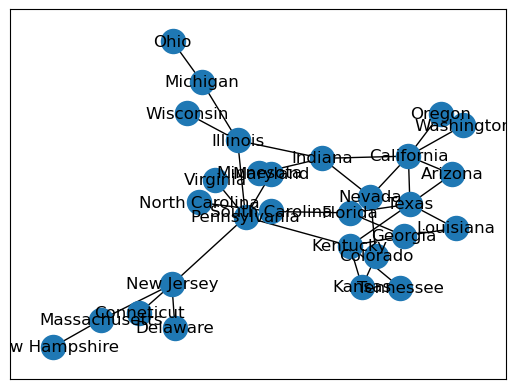

In [389]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [390]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [391]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [392]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [393]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [394]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df3 = df3[df3.Shortest_path_to_production_facility != 0]
    return df3

In [395]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4

In [396]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [397]:
def cost_function(graph, location, weight, demand):
    df4 = pd.DataFrame(columns=['State', 'Shortest_path_to_production_facility', 'Warehouse_size', 'Total_distance', 'Trucks_Needed','Shortest_Path_Times_Trucks_Needed','Each_truck_costs_for_miles','Each_truck_costs_for_driver','Combined_costs_truck','Combined_costs_total_trucks'])
    b = nx.shortest_path_length(graph, location, weight=weight)
    for i in b:
        shortest_path_length = b[i]
        if shortest_path_length > 0:
            # Compute the other statistics as before
            warehouse_size = Mississippi_Graph.nodes[i][demand]
            total_distance = shortest_path_length * warehouse_size
            load_per_route_truck = 169030
            trucks_needed = math.ceil(warehouse_size/load_per_route_truck)
            Shortest_Path_Times_Trucks_Needed = shortest_path_length*trucks_needed
            Each_truck_costs_for_miles = shortest_path_length*2.74
            Each_truck_costs_for_driver = 310 * (shortest_path_length / 650)
            Combined_costs_truck = Each_truck_costs_for_miles + Each_truck_costs_for_driver
            Combined_costs_total_trucks = Combined_costs_truck*trucks_needed
        else:
            # Handle the case where the shortest path length is zero or very small
            warehouse_size = 0
            total_distance = 0
            load_per_route_truck = 0
            trucks_needed = 0
            Shortest_Path_Times_Trucks_Needed = 0
            Each_truck_costs_for_miles = 0
            Each_truck_costs_for_driver = 0
            Combined_costs_truck = 0
            Combined_costs_total_trucks = 0
        new_row = {'State': i, 'Shortest_path_to_production_facility': shortest_path_length, 'Warehouse_size': warehouse_size, 'Total_distance': total_distance, 'Trucks_Needed': trucks_needed, 'Shortest_Path_Times_Trucks_Needed': Shortest_Path_Times_Trucks_Needed, 'Each_truck_costs_for_miles': Each_truck_costs_for_miles, 'Each_truck_costs_for_driver': Each_truck_costs_for_driver, 'Combined_costs_truck': Combined_costs_truck, 'Combined_costs_total_trucks': Combined_costs_total_trucks}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4

In [398]:
def cost_function2(graph, location, weight, demand):
    df4 = pd.DataFrame(columns=['State', 'Shortest_path_to_production_facility', 'Warehouse_size', 'Total_distance', 'Trucks_Needed','Shortest_Path_Times_Trucks_Needed','Each_truck_costs_for_miles','Each_truck_costs_for_driver','Combined_costs_truck','Combined_costs_total_trucks'])
    b = nx.shortest_path_length(graph, location, weight=weight)
    for i in b:
        shortest_path_length = b[i]
        if shortest_path_length > 0:
            # Compute the other statistics as before
            warehouse_size = Mississippi_Graph.nodes[i][demand]
            total_distance = shortest_path_length * warehouse_size
            load_per_route_truck = 50000
            trucks_needed = math.ceil(warehouse_size/load_per_route_truck)
            Shortest_Path_Times_Trucks_Needed = shortest_path_length*trucks_needed
            Each_truck_costs_for_miles = shortest_path_length*2.74
            Each_truck_costs_for_driver = 310 * (shortest_path_length / 650)
            Combined_costs_truck = Each_truck_costs_for_miles + Each_truck_costs_for_driver
            Combined_costs_total_trucks = Combined_costs_truck*trucks_needed
        else:
            # Handle the case where the shortest path length is zero or very small
            warehouse_size = 0
            total_distance = 0
            load_per_route_truck = 0
            trucks_needed = 0
            Shortest_Path_Times_Trucks_Needed = 0
            Each_truck_costs_for_miles = 0
            Each_truck_costs_for_driver = 0
            Combined_costs_truck = 0
            Combined_costs_total_trucks = 0
        new_row = {'State': i, 'Shortest_path_to_production_facility': shortest_path_length, 'Warehouse_size': warehouse_size, 'Total_distance': total_distance, 'Trucks_Needed': trucks_needed, 'Shortest_Path_Times_Trucks_Needed': Shortest_Path_Times_Trucks_Needed, 'Each_truck_costs_for_miles': Each_truck_costs_for_miles, 'Each_truck_costs_for_driver': Each_truck_costs_for_driver, 'Combined_costs_truck': Combined_costs_truck, 'Combined_costs_total_trucks': Combined_costs_total_trucks}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    df4 = df4[df4.Shortest_path_to_production_facility != 0]
    return df4['Combined_costs_total_trucks'].sum()

In [399]:
def total_costs(graph, location, weight, demand):
    a = cost_function2(graph, location, weight, demand)
    b = cost_function_production_facility2(graph, location, demand)
    return (a+b)

In [400]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [401]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [402]:
def metrics_graph(graph, graph2,weight,demand,location):
    c = closeness_centrality(graph2,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph2, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    j = cost_function2(graph, location, weight, demand)
    k = cost_function(graph, location, weight, demand)

    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    print('Trucks required:')
    display(k)
    print('Price trucks:')
    display(j)

    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)

    
    import warnings
    warnings.filterwarnings("ignore")

In [403]:
metrics_graph(graph=Mississippi_Graph,graph2=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1685.1272355988601

Entropic degree:


,Entropic_Degree
California,10101.622042
Texas,8537.698356
Indiana,7466.658887
Kentucky,4717.331700
Nevada,4245.905455
Pennsylvania,3942.749267
Illinois,2494.283836
Arizona,2287.047361
Florida,2109.860532
Colorado,1961.406416


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Minnesota,3034,820000,2487880000,5,15170,8313.16,1446.984615,9760.144615,48800.723077
27,Ohio,2889,1855000,5359095000,11,31779,7915.86,1377.830769,9293.690769,102230.598462
26,Washington,2885,2280000,6577800000,14,40390,7904.9,1375.923077,9280.823077,129931.523077
25,Oregon,2728,855000,2332440000,6,16368,7474.72,1301.046154,8775.766154,52654.596923
24,Michigan,2635,1000000,2635000000,6,15810,7219.9,1256.692308,8476.592308,50859.553846
23,Wisconsin,2508,1100000,2758800000,7,17556,6871.92,1196.123077,8068.043077,56476.301538
22,Indiana,2452,5450000,13363400000,33,80916,6718.48,1169.415385,7887.895385,260300.547692
21,Nevada,2322,2150000,4992300000,13,30186,6362.28,1107.415385,7469.695385,97106.04
20,Illinois,2244,6012000,13490928000,36,80784,6148.56,1070.215385,7218.775385,259875.913846
19,California,2192,14123800,30959369600,84,184128,6006.08,1045.415385,7051.495385,592325.612308


Price trucks:


10910011.250769233

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

Graph with 29 nodes and 28 edges


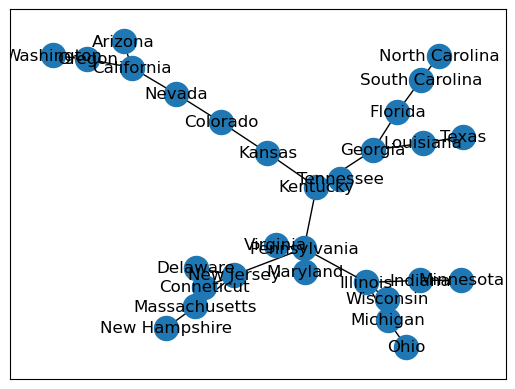

In [404]:
a = nx.minimum_spanning_tree(Mississippi_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [405]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
directed1 = pd.read_excel('distance_state_louisiana_4.xlsx')
# Show contents of the dataframe
directed1

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Georgia,Kentucky,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


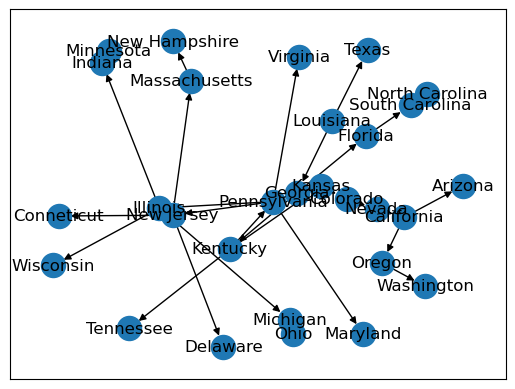

In [406]:
Directed_Graph1= nx.from_pandas_edgelist(directed1, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph1,with_labels=True)
print(Directed_Graph1)

In [407]:
metrics_graph(graph=Directed_Graph1,graph2=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
24,Louisiana,1244.380678
3,Kentucky,1105.655133
0,California,1071.844388
9,Pennsylvania,1030.531892
18,Illinois,706.745746
28,Colorado,504.900000
5,Georgia,442.991411
12,New Jersey,432.323032
16,Indiana,322.719000
8,Kansas,281.448000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3969,3210500,12742474500
27,Washington,3910,2280000,8914800000
26,Oregon,3750,855000,3206250000
25,California,3214,14123800,45393893200
24,Nevada,3084,2150000,6630600000
23,Minnesota,3034,820000,2487880000
22,Ohio,2889,1855000,5359095000
21,Michigan,2635,1000000,2635000000
20,Wisconsin,2508,1100000,2758800000
19,Indiana,2452,5450000,13363400000


Total distance per product=


1958.9993043193174

Entropic degree:


,Entropic_Degree
Kentucky,2004.996160
Pennsylvania,1766.121494
California,1671.523503
Illinois,1261.775594
Louisiana,1244.380678
Colorado,990.000000
Georgia,862.102580
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Arizona,3969,3210500,12742474500,19,75411,10875.06,1892.907692,12767.967692,242591.386154
27,Washington,3910,2280000,8914800000,14,54740,10713.4,1864.769231,12578.169231,176094.369231
26,Oregon,3750,855000,3206250000,6,22500,10275.0,1788.461538,12063.461538,72380.769231
25,California,3214,14123800,45393893200,84,269976,8806.36,1532.830769,10339.190769,868492.024615
24,Nevada,3084,2150000,6630600000,13,40092,8450.16,1470.830769,9920.990769,128972.88
23,Minnesota,3034,820000,2487880000,5,15170,8313.16,1446.984615,9760.144615,48800.723077
22,Ohio,2889,1855000,5359095000,11,31779,7915.86,1377.830769,9293.690769,102230.598462
21,Michigan,2635,1000000,2635000000,6,15810,7219.9,1256.692308,8476.592308,50859.553846
20,Wisconsin,2508,1100000,2758800000,7,17556,6871.92,1196.123077,8068.043077,56476.301538
19,Indiana,2452,5450000,13363400000,33,80916,6718.48,1169.415385,7887.895385,260300.547692


Price trucks:


12685295.986153848

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Kentucky,0.000748,0.664021,1105.655133,0.548992
1,Pennsylvania,0.000737,0.656085,1030.531892,0.498099
13,Illinois,0.000552,0.325397,706.745746,0.126907
7,Georgia,0.000631,0.320106,442.991411,0.089499
2,New Jersey,0.000693,0.267196,432.323032,0.080020
25,California,0.000361,0.203704,1071.844388,0.078904
14,Colorado,0.000501,0.304233,504.900000,0.076886
9,Kansas,0.000599,0.349206,281.448000,0.058852
16,Louisiana,0.000487,0.071429,1244.380678,0.043272
12,Florida,0.000556,0.137566,194.859500,0.014902


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE KENTUCKY

In [408]:
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 50000000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 5145000
metrics_graph(graph=a,graph2=a,weight='Distance',demand='warehouse size',location='Kentucky')

Closeness centrality for all nodes:


,State,Closeness_centrality
9,Kentucky,0.000748
14,Pennsylvania,0.000737
18,New Jersey,0.000693
16,Maryland,0.000682
10,Tennessee,0.000649
20,Delaware,0.000645
17,Virginia,0.000637
11,Georgia,0.000631
19,Conneticut,0.000618
13,Kansas,0.000599


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3036
27,Washington,2977
26,Oregon,2817
25,California,2281
24,Nevada,2151
23,Minnesota,2101
22,Ohio,1956
21,Michigan,1702
20,Wisconsin,1575
19,Indiana,1519


Average shortest path to production center:


1337.3214285714287

Betweenness centrality for all nodes:


,State,Betweenness_centrality
9,Kentucky,0.664021
14,Pennsylvania,0.656085
13,Kansas,0.349206
25,Illinois,0.325397
11,Georgia,0.320106
23,Colorado,0.304233
18,New Jersey,0.267196
3,Nevada,0.253968
2,California,0.203704
8,Florida,0.137566


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
9,Kentucky,2829.857840
14,Pennsylvania,1638.786305
25,Illinois,1397.098262
2,California,1276.282457
23,Colorado,1000.317272
11,Georgia,896.080697
13,Kansas,786.630322
7,Louisiana,686.213725
3,Nevada,675.150957
18,New Jersey,573.837256


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3036,3210500,9747078000
27,Washington,2977,2280000,6787560000
26,Oregon,2817,855000,2408535000
25,California,2281,14123800,32216387800
24,Nevada,2151,2150000,4624650000
23,Minnesota,2101,820000,1722820000
22,Ohio,1956,1855000,3628380000
21,Michigan,1702,1000000,1702000000
20,Wisconsin,1575,1100000,1732500000
19,Indiana,1519,5450000,8278550000


Total distance per product=


1312.0774764383148

Entropic degree:


,Entropic_Degree
Kentucky,2829.857840
Pennsylvania,2808.545510
Illinois,2494.283836
California,1990.341273
Colorado,1961.406416
Georgia,1743.856568
Kansas,1509.267693
Nevada,1294.632707
Louisiana,1244.380678
New Jersey,1098.042970


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Arizona,3036,3210500,9747078000,19,57684,8318.64,1447.938462,9766.578462,185564.990769
27,Washington,2977,2280000,6787560000,14,41678,8156.98,1419.8,9576.78,134074.92
26,Oregon,2817,855000,2408535000,6,16902,7718.58,1343.492308,9062.072308,54372.433846
25,California,2281,14123800,32216387800,84,191604,6249.94,1087.861538,7337.801538,616375.329231
24,Nevada,2151,2150000,4624650000,13,27963,5893.74,1025.861538,6919.601538,89954.82
23,Minnesota,2101,820000,1722820000,5,10505,5756.74,1002.015385,6758.755385,33793.776923
22,Ohio,1956,1855000,3628380000,11,21516,5359.44,932.861538,6292.301538,69215.316923
21,Michigan,1702,1000000,1702000000,6,10212,4663.48,811.723077,5475.203077,32851.218462
20,Wisconsin,1575,1100000,1732500000,7,11025,4315.5,751.153846,5066.653846,35466.576923
19,Indiana,1519,5450000,8278550000,33,50127,4162.06,724.446154,4886.506154,161254.703077


Price trucks:


8495099.266153848

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Kentucky,0.000748,0.664021,2829.857840,1.405111
1,Pennsylvania,0.000737,0.656085,1638.786305,0.792094
13,Illinois,0.000552,0.325397,1397.098262,0.250869
7,Georgia,0.000631,0.320106,896.080697,0.181037
9,Kansas,0.000599,0.349206,786.630322,0.164489
14,Colorado,0.000501,0.304233,1000.317272,0.152328
2,New Jersey,0.000693,0.267196,573.837256,0.106214
25,California,0.000361,0.203704,1276.282457,0.093954
24,Nevada,0.000375,0.253968,675.150957,0.064228
12,Florida,0.000556,0.137566,438.190976,0.033511


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [409]:
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [410]:
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [411]:
huge_network2 = huge_network.copy()

In [412]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [413]:
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [414]:
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [415]:
huge_network2 = huge_network.copy()

In [416]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == huge_network.iloc[i,0]:
        l2.append(i)

In [417]:
joinedlist = l2

In [418]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

In [419]:
huge_network2

,0,b,Distance
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
4,Washington,Texas,2249.1
5,Washington,Louisiana,2579.6
8,Washington,Massachusetts,3074.6
...,...,...,...
1443,Wisconsin,Oregon,2022.7
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


Graph with 29 nodes and 406 edges


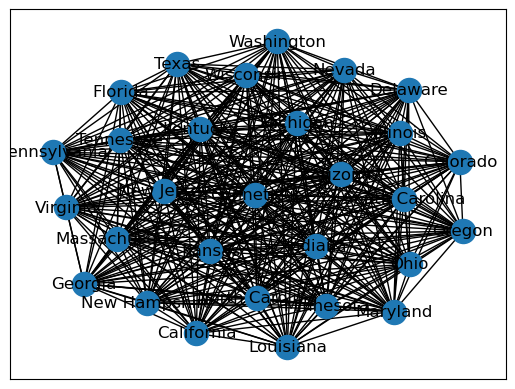

In [420]:
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

Graph with 29 nodes and 28 edges


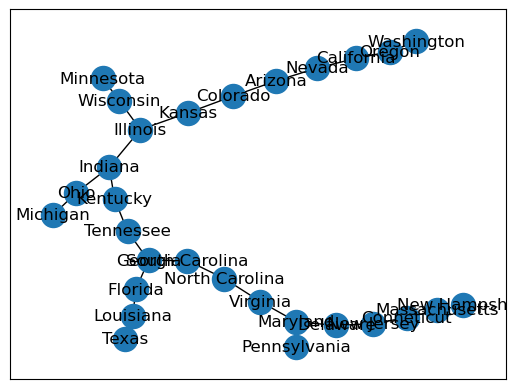

In [421]:
a = nx.minimum_spanning_tree(Huge_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [422]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
minimal_huge_graph = pd.read_excel('distance_state_minimal_network_louisiana_2.xlsx')
# Show contents of the dataframe
minimal_huge_graph

,weight,0,b,Distance
0,1,Oregon,Washington,160
1,1,California,Oregon,536
2,1,Nevada,California,130
3,1,Arizona,Nevada,740
4,1,Colorado,Arizona,819
5,1,Kansas,Colorado,540
6,1,Illinois,Kansas,373
7,1,Illinois,Wisconsin,264
8,1,Wisconsin,Minnesota,251
9,1,Indiana,Illinois,208


DiGraph with 29 nodes and 28 edges


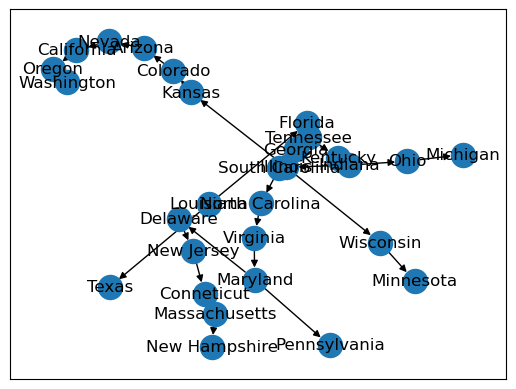

In [423]:
Directed_Minimal_Huge_Graph= nx.from_pandas_edgelist(minimal_huge_graph, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Minimal_Huge_Graph,with_labels=True)
print(Directed_Minimal_Huge_Graph)

In [424]:
metrics_graph(graph=Directed_Minimal_Huge_Graph,graph2=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4835
27,Oregon,4675
26,California,4139
25,Nevada,4009
24,Arizona,3269
23,Colorado,2450
22,Minnesota,2052
21,New Hampshire,1999
20,Massachusetts,1931
19,Kansas,1910


Average shortest path to production center:


1942.0

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
17,Louisiana,1140.961460
7,Illinois,461.923115
5,Colorado,417.690000
4,Arizona,393.757700
2,California,343.703568
15,Georgia,309.299593
10,Indiana,281.883063
6,Kansas,281.448000
16,Florida,143.262900
11,Ohio,131.711700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4835,2280000,11023800000
27,Oregon,4675,855000,3997125000
26,California,4139,14123800,58458408200
25,Nevada,4009,2150000,8619350000
24,Arizona,3269,3210500,10495124500
23,Colorado,2450,1000000,2450000000
22,Minnesota,2052,820000,1682640000
21,New Hampshire,1999,63800,127536200
20,Massachusetts,1931,1000000,1931000000
19,Kansas,1910,2120000,4049200000


Total distance per product=


1955.8376775060246

Entropic degree:


,Entropic_Degree
Louisiana,1140.961460
Illinois,824.685987
Colorado,819.000000
Arizona,740.000000
Georgia,601.925841
Kansas,540.000000
California,536.000000
Indiana,508.355389
Florida,261.000000
Ohio,254.000000


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,4835,2280000,11023800000,14,67690,13247.9,2305.923077,15553.823077,217753.523077
27,Oregon,4675,855000,3997125000,6,28050,12809.5,2229.615385,15039.115385,90234.692308
26,California,4139,14123800,58458408200,84,347676,11340.86,1973.984615,13314.844615,1118446.947692
25,Nevada,4009,2150000,8619350000,13,52117,10984.66,1911.984615,12896.644615,167656.38
24,Arizona,3269,3210500,10495124500,19,62111,8957.06,1559.061538,10516.121538,199806.309231
23,Colorado,2450,1000000,2450000000,6,14700,6713.0,1168.461538,7881.461538,47288.769231
22,Minnesota,2052,820000,1682640000,5,10260,5622.48,978.646154,6601.126154,33005.630769
21,New Hampshire,1999,63800,127536200,1,1999,5477.26,953.369231,6430.629231,6430.629231
20,Massachusetts,1931,1000000,1931000000,6,11586,5290.94,920.938462,6211.878462,37271.270769
19,Kansas,1910,2120000,4049200000,13,24830,5233.4,910.923077,6144.323077,79876.2


Price trucks:


12660834.503076924

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
5,Illinois,0.000704,0.489418,461.923115,0.159203
2,Georgia,0.000749,0.595238,309.299593,0.137941
3,Indiana,0.000740,0.560847,281.883063,0.117009
19,Colorado,0.000513,0.304233,417.690000,0.065138
10,Kansas,0.000617,0.349206,281.448000,0.060674
0,Tennessee,0.000754,0.518519,112.728000,0.044085
20,Louisiana,0.000510,0.071429,1140.961460,0.041594
24,Arizona,0.000399,0.253968,393.757700,0.039899
4,South Carolina,0.000712,0.452381,118.811800,0.038282
1,Kentucky,0.000750,0.515873,91.540700,0.035418


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE ILLINOIS

In [425]:
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 50000000

In [426]:
metrics_graph(graph=a,graph2=a,weight='Distance',demand='warehouse size',location='Illinois')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,3301.5
27,Oregon,3143.1
26,California,2607.0
25,Nevada,2476.3
24,New Hampshire,2134.9
23,Massachusetts,2066.3
22,Texas,1984.2
21,Conneticut,1964.8
20,New Jersey,1777.7
19,Arizona,1736.8


Average shortest path to production center:


1420.0357142857142

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
25,Illinois,1261.431684
19,Arizona,1078.184392
10,Colorado,898.804728
4,Louisiana,634.971630
27,Kansas,618.951777
2,Georgia,560.289340
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
15,Indiana,460.449414


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,3301.5,2280000,7527420000.0
27,Oregon,3143.1,855000,2687350500.0
26,California,2607.0,14123800,36820746600.0
25,Nevada,2476.3,2150000,5324045000.0
24,New Hampshire,2134.9,63800,136206620.0
23,Massachusetts,2066.3,1000000,2066300000.0
22,Texas,1984.2,8834000,17528422800.000004
21,Conneticut,1964.8,14123800,27750442240.000004
20,New Jersey,1777.7,2260000,4017602000.0
19,Arizona,1736.8,3210500,5575996400.000001


Total distance per product=


1603.3019102232076

Entropic degree:


,Entropic_Degree
Arizona,2026.262470
Colorado,1762.362211
Illinois,1261.431684
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1090.375284
Nevada,1030.079520
Florida,930.534713
Oregon,856.451480
Indiana,830.386680


Trucks required:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
28,Washington,3301.5,2280000,7527420000.0,14,46221.0,9046.11,1574.561538,10620.671538,148689.401538
27,Oregon,3143.1,855000,2687350500.0,6,18858.6,8612.094,1499.016923,10111.110923,60666.665538
26,California,2607.0,14123800,36820746600.0,84,218988.0,7143.18,1243.338462,8386.518462,704467.550769
25,Nevada,2476.3,2150000,5324045000.0,13,32191.9,6785.062,1181.004615,7966.066615,103558.866
24,New Hampshire,2134.9,63800,136206620.0,1,2134.9,5849.626,1018.183077,6867.809077,6867.809077
23,Massachusetts,2066.3,1000000,2066300000.0,6,12397.8,5661.662,985.466154,6647.128154,39882.768923
22,Texas,1984.2,8834000,17528422800.000004,53,105162.6,5436.708,946.310769,6383.018769,338299.994769
21,Conneticut,1964.8,14123800,27750442240.000004,84,165043.2,5383.552,937.058462,6320.610462,530931.278769
20,New Jersey,1777.7,2260000,4017602000.0,14,24887.8,4870.898,847.826154,5718.724154,80062.138154
19,Arizona,1736.8,3210500,5575996400.000001,19,32999.2,4758.832,828.32,5587.152,106155.888


Price trucks:


10372475.950615387

,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
5,Illinois,0.000704,0.489418,1261.431684,0.434755
2,Georgia,0.000749,0.595238,560.289340,0.249877
3,Indiana,0.000740,0.560847,460.449414,0.191131
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
1,Kentucky,0.000750,0.515873,268.320324,0.103815
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


# PART 2 CLUSTER CODE

In [427]:
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000


In [428]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
locations = pd.read_csv('us-state-capitals.csv')
# Show contents of the dataframe
locations

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [429]:
locations.rename(columns={"name":"0"},inplace=True)
locations.drop(locations.columns[[1]], axis=1, inplace=True)
locations

,0,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


In [430]:
for i in range(len(locations)):        
    if locations.iloc[i,0] == 'Connecticut':
        locations.iloc[i,0] = 'Conneticut'

In [431]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(locations)):
    if locations.iloc[i,0] not in c:
        l2.append(i)

In [432]:
locations.drop(locations.index[l2], inplace=True)
a = locations.pop('0')
#locations.drop(locations.columns[[0]], axis=1, inplace=True)
locations

,latitude,longitude
2,33.448143,-112.096962
4,38.576668,-121.493629
5,39.739227,-104.984856
6,41.764046,-72.682198
7,39.157307,-75.519722
9,30.438118,-84.281296
10,33.749027,-84.388229
12,39.798363,-89.654961
13,39.768623,-86.162643
15,39.048191,-95.677956


In [433]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np

def get_even_clusters(X, cluster_size):
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    return clusters

In [434]:
b  = get_even_clusters(locations, 10)

In [435]:
def get_even_clusters2(X, cluster_size):
    global centroids
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    return centroids

In [436]:
c  = get_even_clusters2(locations, 10)

In [437]:
centroids

array([[  37.329407  ,  -87.98762186],
       [  40.483703  , -117.3794975 ],
       [  39.91882644,  -75.00231089]])

In [438]:
centroids = pd.DataFrame(centroids, columns = ['Latitude','Longitude'])

In [439]:
centroids

,Latitude,Longitude
0,37.329407,-87.987622
1,40.483703,-117.379497
2,39.918826,-75.002311


In [440]:
from sklearn.neighbors import KDTree
import numpy as np

def distance(loc1, loc2):
    loc1 = np.asarray(loc1)
    loc2 = np.asarray(loc2)
    return np.sqrt(np.sum((loc1 - loc2)**2))


centroids_array = locations[['latitude', 'longitude']].values

tree = KDTree(centroids_array)


for index, row in centroids.iterrows():
    crime_loc = [row['Latitude'], row['Longitude']]
    # Use the kd-tree to find the index of the nearest centroid
    _, nearest_centroid_index = tree.query([crime_loc], k=1)
    # Get the location of the nearest centroid
    nearest_centroid_loc = centroids_array[nearest_centroid_index][0]
    # Calculate the distance between the crime location and the nearest centroid
    dist = distance(crime_loc, nearest_centroid_loc)
    print(nearest_centroid_loc)

[[ 36.16581  -86.784241]]
[[  39.163914 -119.766121]]
[[ 40.220596 -74.769913]]


In [441]:
df = pd.DataFrame(b, a)
df.rename(columns={0:"cluster"},inplace=True)
df

,cluster
0,
Arizona,1
California,1
Colorado,1
Conneticut,0
Delaware,0
Florida,2
Georgia,2
Illinois,2
Indiana,2


In [442]:
cluster1 = df.loc[df['cluster'] == 0]

In [443]:
list1 = cluster1.index.tolist()

In [444]:
cluster2 = df.loc[df['cluster'] == 1]

In [445]:
cluster3 = df.loc[df['cluster'] == 2]

In [446]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list1 or huge_network2.iloc[i,1] not in list1:
        l2.append(i)

In [447]:
cluster_network1 = huge_network2.copy()

In [448]:
cluster_network1.drop(cluster_network1.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


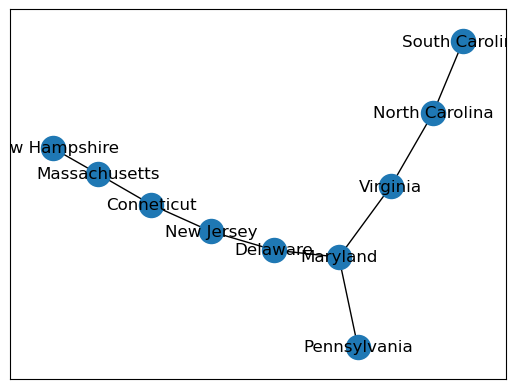

In [449]:
Cluster1_Graph = nx.from_pandas_edgelist(cluster_network1, 0, 'b', edge_attr='Distance')
Cluster1_Graph = nx.minimum_spanning_tree(Cluster1_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster1_Graph,with_labels=True)
print(Cluster1_Graph)

In [450]:
list2 = cluster2.index.tolist()


In [451]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list2 or huge_network2.iloc[i,1] not in list2:
        l2.append(i)

In [452]:
cluster_network2 = huge_network2.copy()

In [453]:
cluster_network2.drop(cluster_network2.index[l2], inplace=True)

Graph with 9 nodes and 8 edges


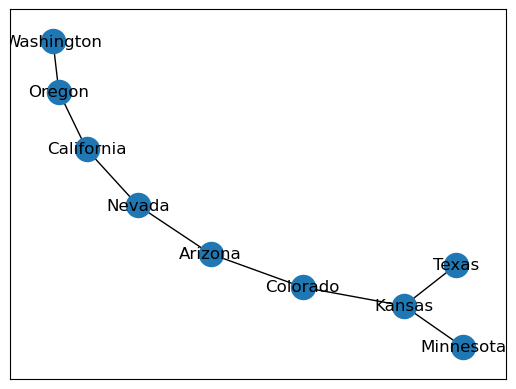

In [454]:
Cluster2_Graph = nx.from_pandas_edgelist(cluster_network2, 0, 'b', edge_attr='Distance')
Cluster2_Graph = nx.minimum_spanning_tree(Cluster2_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster2_Graph,with_labels=True)
print(Cluster2_Graph)

In [455]:
list3 = cluster3.index.tolist()

In [456]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list3 or huge_network2.iloc[i,1] not in list3:
        l2.append(i)

In [457]:
cluster_network3 = huge_network2.copy()

In [458]:
cluster_network3.drop(cluster_network3.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


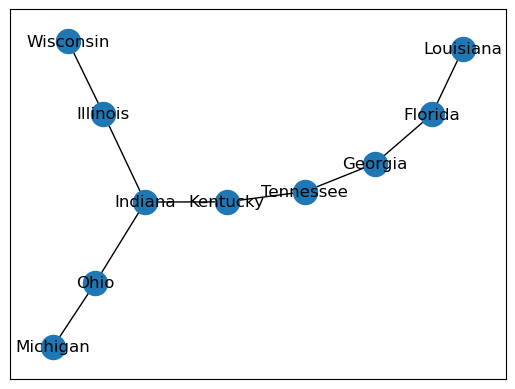

In [459]:
Cluster3_Graph = nx.from_pandas_edgelist(cluster_network3, 0, 'b', edge_attr='Distance')
Cluster3_Graph = nx.minimum_spanning_tree(Cluster3_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster3_Graph,with_labels=True)
print(Cluster3_Graph)

In [460]:
def metrics_cluster1(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    global b4
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    b4 = pd.concat([b1, b2, b3])
    average_shortest_path = b4['Shortest_path_to_production_facility'].sum() / len(b4) - 3
    display(b4)
    print("Average shortest path:", average_shortest_path)
    
    g1 = shortest_path_product1(graph1,location1,weight,demand)
    g2 = shortest_path_product1(graph2,location2,weight,demand)
    g3 = shortest_path_product1(graph3,location3,weight,demand)
    g4 = pd.concat([g1, g2, g3])
    average_shortest_product_path = g4['Total_distance'].sum()/g4['Warehouse_size'].sum()
    display(g4)
    print('Average shortest path per product:', average_shortest_product_path)
    
    c1 = cost_function(graph1, location1, weight, demand)
    c2 = cost_function(graph2, location2, weight, demand)
    c3 = cost_function(graph3, location3, weight, demand)
    c4 = pd.concat([c1, c2, c3])
    print("Trucks needed:")
    display(c4)
    print('Price trucks:')
    total_costs_trucks = c4['Combined_costs_total_trucks'].sum()
    display(total_costs_trucks)
    

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE LOUISIANA

In [461]:
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["California"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 2300000


metrics_cluster1(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','New Jersey','Nevada','Louisiana')

,State,Shortest_path_to_production_facility
9,South Carolina,726.2
8,North Carolina,500.3
7,New Hampshire,357.2
6,Virginia,322.6
5,Massachusetts,288.6
4,Pennsylvania,288.1
3,Conneticut,187.1
2,Maryland,180.2
1,Delaware,112.7
8,Texas,2790.5


Average shortest path: 986.2346153846152


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,South Carolina,726.2,2340000,1699308000.0
8,North Carolina,500.3,397800,199019340.0
7,New Hampshire,357.2,63800,22789360.0
6,Virginia,322.6,2300000,741980000.0
5,Massachusetts,288.6,1000000,288600000.0
4,Pennsylvania,288.1,8350000,2405635000.0
3,Conneticut,187.1,2300000,430330000.0
2,Maryland,180.2,14123800,2545108760.0
1,Delaware,112.7,1000200,112722540.0
8,Texas,2790.5,8834000,24651277000.0


Average shortest path per product: 947.9488471379472
Trucks needed:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
9,South Carolina,726.2,2340000,1699308000.0,14,10166.8,1989.788,346.341538,2336.129538,32705.813538
8,North Carolina,500.3,397800,199019340.0,3,1500.9,1370.822,238.604615,1609.426615,4828.279846
7,New Hampshire,357.2,63800,22789360.0,1,357.2,978.728,170.356923,1149.084923,1149.084923
6,Virginia,322.6,2300000,741980000.0,14,4516.4,883.924,153.855385,1037.779385,14528.911385
5,Massachusetts,288.6,1000000,288600000.0,6,1731.6,790.764,137.64,928.404,5570.424
4,Pennsylvania,288.1,8350000,2405635000.0,50,14405.0,789.394,137.401538,926.795538,46339.776923
3,Conneticut,187.1,2300000,430330000.0,14,2619.4,512.654,89.232308,601.886308,8426.408308
2,Maryland,180.2,14123800,2545108760.0,84,15136.8,493.748,85.941538,579.689538,48693.921231
1,Delaware,112.7,1000200,112722540.0,6,676.2,308.798,53.749231,362.547231,2175.283385
8,Texas,2790.5,8834000,24651277000.0,53,147896.5,7645.97,1330.853846,8976.823846,475771.663846


Price trucks:


1758623.325692308

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE KENTUCKY

In [462]:
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 3680000
metrics_cluster1(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','New Jersey','Nevada','Tennessee')

,State,Shortest_path_to_production_facility
9,South Carolina,726.2
8,North Carolina,500.3
7,New Hampshire,357.2
6,Virginia,322.6
5,Massachusetts,288.6
4,Pennsylvania,288.1
3,Conneticut,187.1
2,Maryland,180.2
1,Delaware,112.7
8,Texas,2790.5


Average shortest path: 747.5115384615384


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,South Carolina,726.2,2340000,1699308000.0
8,North Carolina,500.3,397800,199019340.0
7,New Hampshire,357.2,63800,22789360.0
6,Virginia,322.6,2300000,741980000.0
5,Massachusetts,288.6,1000000,288600000.0
4,Pennsylvania,288.1,8350000,2405635000.0
3,Conneticut,187.1,2300000,430330000.0
2,Maryland,180.2,14123800,2545108760.0
1,Delaware,112.7,1000200,112722540.0
8,Texas,2790.5,8834000,24651277000.0


Average shortest path per product: 736.8873022578341
Trucks needed:


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance,Trucks_Needed,Shortest_Path_Times_Trucks_Needed,Each_truck_costs_for_miles,Each_truck_costs_for_driver,Combined_costs_truck,Combined_costs_total_trucks
9,South Carolina,726.2,2340000,1699308000.0,14,10166.8,1989.788,346.341538,2336.129538,32705.813538
8,North Carolina,500.3,397800,199019340.0,3,1500.9,1370.822,238.604615,1609.426615,4828.279846
7,New Hampshire,357.2,63800,22789360.0,1,357.2,978.728,170.356923,1149.084923,1149.084923
6,Virginia,322.6,2300000,741980000.0,14,4516.4,883.924,153.855385,1037.779385,14528.911385
5,Massachusetts,288.6,1000000,288600000.0,6,1731.6,790.764,137.64,928.404,5570.424
4,Pennsylvania,288.1,8350000,2405635000.0,50,14405.0,789.394,137.401538,926.795538,46339.776923
3,Conneticut,187.1,2300000,430330000.0,14,2619.4,512.654,89.232308,601.886308,8426.408308
2,Maryland,180.2,14123800,2545108760.0,84,15136.8,493.748,85.941538,579.689538,48693.921231
1,Delaware,112.7,1000200,112722540.0,6,676.2,308.798,53.749231,362.547231,2175.283385
8,Texas,2790.5,8834000,24651277000.0,53,147896.5,7645.97,1330.853846,8976.823846,475771.663846


Price trucks:


1365923.2315384615

In [463]:
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000